# Modelos no Supervisados - Clustering y PCA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats as stats
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

In [154]:
elecciones = pd.read_excel('DatosEleccionesEspaña.xlsx')
display(elecciones.head())

,Name,CodigoProvincia,CCAA,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge,DifComAutonPtge,UnemployLess25_Ptge,Unemploy25_40_Ptge,UnemployMore40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,totalEmpresas,Industria,Construccion,ComercTTEHosteleria,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones
0,Abadía,10,Extremadura,336,282,20.213,0,60.444,35.555,1.778,1,0,3.869,18.155,55.059,26.785,44.048,0.89,79.762,0.298,19.345,2.381,54.762,42.857,4.762,9.524,11.905,73.810,15.0,0.0,0.0,0.0,0.0,Otro,216.0,326.0,4507.5593,MuyBaja,3.07,1.56,28
1,Abertura,10,Extremadura,429,364,25.275,0,54.779,44.118,0.368,1,0,1.632,13.055,56.643,30.304,50.117,1.63,90.909,2.797,7.226,16.216,32.432,51.351,8.108,8.108,10.811,67.568,11.0,0.0,0.0,0.0,0.0,Otro,382.0,459.0,6270.7646,MuyBaja,-6.54,1.12,67
2,Acebo,10,Extremadura,569,569,27.241,0,44.203,53.140,0.966,0,1,1.230,9.139,54.834,36.028,49.033,0.70,78.910,0.703,18.102,8.197,36.066,55.738,22.951,9.836,13.115,49.180,49.0,0.0,0.0,0.0,0.0,Otro,918.0,674.0,5702.1000,MuyBaja,-15.58,0.62,74
3,Acehúche,10,Extremadura,822,704,30.114,1,50.813,45.325,0.000,1,0,4.258,14.964,60.098,24.940,51.095,0.12,93.917,0.487,5.109,7.407,61.111,31.481,16.667,5.556,16.667,59.259,50.0,0.0,0.0,0.0,0.0,Otro,599.0,842.0,9106.4649,MuyBaja,-2.38,1.37,66
4,Aceituna,10,Extremadura,623,540,30.185,1,44.562,49.867,0.796,0,1,3.531,15.569,59.391,25.042,48.154,0.64,93.258,0.161,4.173,15.385,48.077,36.538,21.154,0.000,11.538,61.538,22.0,0.0,0.0,0.0,0.0,Otro,394.0,625.0,4007.6141,MuyBaja,-0.32,1.58,96


In [155]:
elec = elecciones.iloc[:, [0,1,2,3,5,7,8,13,14,15,17,28, 38]]
display(elec.head())

,Name,CodigoProvincia,CCAA,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
0,Abadía,10,Extremadura,336,20.213,60.444,35.555,18.155,55.059,26.785,0.89,15.0,3.07
1,Abertura,10,Extremadura,429,25.275,54.779,44.118,13.055,56.643,30.304,1.63,11.0,-6.54
2,Acebo,10,Extremadura,569,27.241,44.203,53.140,9.139,54.834,36.028,0.70,49.0,-15.58
3,Acehúche,10,Extremadura,822,30.114,50.813,45.325,14.964,60.098,24.940,0.12,50.0,-2.38
4,Aceituna,10,Extremadura,623,30.185,44.562,49.867,15.569,59.391,25.042,0.64,22.0,-0.32


Se escogen las diez variables numéricas más la variable CCAA, en este caso se intentará enfocar en la abstinencia de los votos contra la población, los rangos de edades, la participación de extranjeros y el total de empresas y cambio en la población, y así conocer los efectos entre ellas. A ver que agrupacions nos espera.

In [156]:
display(elec.info())
display(elec.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8119 non-null   object 
 1   CodigoProvincia   8119 non-null   int64  
 2   CCAA              8119 non-null   object 
 3   Population        8119 non-null   int64  
 4   AbstentionPtge    8119 non-null   float64
 5   Izda_Pct          8119 non-null   float64
 6   Dcha_Pct          8119 non-null   float64
 7   Age_under19_Ptge  8119 non-null   float64
 8   Age_19_65_pct     8119 non-null   float64
 9   Age_over65_pct    8119 non-null   float64
 10  ForeignersPtge    8119 non-null   float64
 11  totalEmpresas     8114 non-null   float64
 12  PobChange_pct     8112 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 824.7+ KB


None

Name                8102
CodigoProvincia       52
CCAA                  19
Population          3597
AbstentionPtge      5675
Izda_Pct            6569
Dcha_Pct            6682
Age_under19_Ptge    5891
Age_19_65_pct       6215
Age_over65_pct      6778
ForeignersPtge      2329
totalEmpresas       1225
PobChange_pct       3048
dtype: int64

Existen valores nulos parala variable total empresas y pobChange

In [157]:
elec.describe()

,CodigoProvincia,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
count,8119.000000,8.119000e+03,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8114.000000,8112.000000
mean,26.670772,5.741855e+03,26.506951,34.403789,48.915409,13.567747,57.371541,29.073583,5.619553,398.603032,-4.897406
std,14.896717,4.621520e+04,7.540091,16.482285,19.945087,6.780648,6.818072,11.745849,7.348553,4219.366083,10.383417
min,1.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,23.459000,0.000000,-8.960000,0.000000,-52.270000
25%,13.000000,1.660000e+02,21.678000,21.892500,38.690500,8.334000,53.845000,19.824500,1.060000,7.000000,-10.400000
50%,26.000000,5.490000e+02,26.429000,35.165000,51.582000,13.889000,58.655000,27.559000,3.590000,30.000000,-4.960000
75%,41.000000,2.427500e+03,31.475000,46.032000,62.201000,19.058500,61.818000,36.908000,8.180000,147.000000,0.092500
max,52.000000,3.141991e+06,57.576000,94.117000,100.000000,33.696000,100.002000,76.471000,71.470000,299397.000000,138.460000


Errores:
- Age_19_65_pct posee un porcentaje con unas centésimas mayor a 100, lo cual no es posible
- ForeignersPtge tiene un porcentaje mínimo que es negativo, tampoco suena razonable (por  el tipo de variable y descripcion revisada sobre esta)
- El tema de la población es delicado, pero parece extraño que los municipios tengan solo 5 habitantes.

Esto pasando por alto errores como que la suma de porcentajes de voto s a izq, der y otros no de 100 y muchos otros “pequeños temas”

In [158]:
pocos_habitantes = np.where( elec['Population']  < 100)
print('Numero de Municipios con Menos de 100 habitantes')
display(len(pocos_habitantes[0]))
print('Error en porcentaje maximo')
display(elec.sort_values(by='Age_19_65_pct', ascending=False).head(3))
print('Error en porcentaje minimo')
display(elec.sort_values(by='ForeignersPtge').head(3))
print('Numero de porcentajes negativos')
negativos = np.where( elec['ForeignersPtge']  < 0)
print (len(negativos[0]))

Numero de Municipios con Menos de 100 habitantes


1222

Error en porcentaje maximo


,Name,CodigoProvincia,CCAA,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
5304,Illán de Vacas,45,CastillaMancha,6,0.000,16.667,66.667,0.000,100.002,0.000,0.00,0.0,20.00
1360,Castilnuevo,19,CastillaMancha,8,0.000,0.000,87.500,0.000,100.000,0.000,0.00,0.0,-38.46
1147,Arenas del Rey,18,Andalucía,1241,32.782,59.913,37.916,24.255,93.797,32.232,13.14,36.0,-38.84


Error en porcentaje minimo


,Name,CodigoProvincia,CCAA,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
841,San Lorenzo de la Parrilla,16,CastillaMancha,1153,24.917,41.037,57.333,15.352,54.728,29.920,-8.96,129.0,-10.48
7362,Villanueva del Fresno,6,Extremadura,3489,31.370,47.946,48.622,20.293,59.759,19.948,-8.90,151.0,-4.75
6613,Peñacerrada-Urizaharra,1,PaísVasco,270,28.390,40.828,28.403,12.223,64.075,23.703,-8.80,23.0,-8.78


Numero de porcentajes negativos
653


In [159]:
elec.loc[elec.Population < 50,:].describe()

,CodigoProvincia,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,27.709402,32.664530,19.956613,31.467194,62.753564,4.775299,53.016562,42.208177,2.737756,0.391026,-10.705171
std,14.401439,10.505462,10.526392,18.963070,20.544316,5.312491,12.354724,13.619242,5.961551,1.407720,18.993047
min,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,23.528000,0.000000,-8.710000,0.000000,-52.270000
25%,16.000000,26.000000,13.008000,16.532500,48.571000,0.000000,45.161750,32.258750,0.000000,0.000000,-22.220000
50%,26.000000,34.000000,20.000000,30.000000,63.636000,3.226000,52.941500,42.105000,0.000000,0.000000,-13.210000
75%,42.000000,41.000000,26.707500,44.444000,78.827750,7.895250,61.580000,51.724250,3.570000,0.000000,-4.625000
max,50.000000,49.000000,51.429000,94.117000,100.000000,26.088000,100.002000,76.471000,40.740000,10.000000,138.460000


Lo de las poblaciones es raro, pero se evaluara mas adelante con la comprobación de outliers de la función gestiona_outliers. Por otro lado el tema de los porcentajes negativos podría ser un error al imputar el valor, en donde se coló el símbolo -, pero al no saber con certeza y comprobar que no representa en incidencia a más del 10 por ciento de los datos, se pondrán como valores nulos.

In [160]:
elec.loc[elec.ForeignersPtge < 0, 'ForeignersPtge'] = np.nan
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8119 non-null   object 
 1   CodigoProvincia   8119 non-null   int64  
 2   CCAA              8119 non-null   object 
 3   Population        8119 non-null   int64  
 4   AbstentionPtge    8119 non-null   float64
 5   Izda_Pct          8119 non-null   float64
 6   Dcha_Pct          8119 non-null   float64
 7   Age_under19_Ptge  8119 non-null   float64
 8   Age_19_65_pct     8119 non-null   float64
 9   Age_over65_pct    8119 non-null   float64
 10  ForeignersPtge    7466 non-null   float64
 11  totalEmpresas     8114 non-null   float64
 12  PobChange_pct     8112 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 824.7+ KB


In [161]:
codigoP = elec.CodigoProvincia
imput = elec.drop('CodigoProvincia', axis=1)
imput.head()

,Name,CCAA,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
0,Abadía,Extremadura,336,20.213,60.444,35.555,18.155,55.059,26.785,0.89,15.0,3.07
1,Abertura,Extremadura,429,25.275,54.779,44.118,13.055,56.643,30.304,1.63,11.0,-6.54
2,Acebo,Extremadura,569,27.241,44.203,53.140,9.139,54.834,36.028,0.70,49.0,-15.58
3,Acehúche,Extremadura,822,30.114,50.813,45.325,14.964,60.098,24.940,0.12,50.0,-2.38
4,Aceituna,Extremadura,623,30.185,44.562,49.867,15.569,59.391,25.042,0.64,22.0,-0.32


In [162]:
imput.select_dtypes(include=np.number).apply(lambda x: x.skew())

Population          45.996406
AbstentionPtge      -0.049941
Izda_Pct             0.059920
Dcha_Pct            -0.468014
Age_under19_Ptge    -0.103561
Age_19_65_pct       -0.814636
Age_over65_pct       0.598441
ForeignersPtge       2.755577
totalEmpresas       53.704675
PobChange_pct        1.505331
dtype: float64

existen muchas variables con sesgos marcados como lo son votos diferentes a izq o derecha, el porcentaje de extranjeros y sobre todo el total de empresas.

In [163]:
imput.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Population
AbstentionPtge
Izda_Pct
Dcha_Pct
Age_under19_Ptge
Age_19_65_pct
Age_over65_pct
ForeignersPtge
totalEmpresas
PobChange_pct


,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
0,0.000000,0.0,0.0,0.0,0.0,0.258653,0.0,0.000000,0.000000,0.000000
1,1.391797,0.0,0.0,0.0,0.0,0.036950,0.0,0.388428,1.281735,0.135602
2,1.391797,0.0,0.0,0.0,0.0,0.295603,0.0,0.388428,1.281735,0.135602


In [164]:
#sns.boxplot(imput.Population)

El máximo porcentaje de outliers es de 1.4% valor muy pequeño y que por lo tanto se mantendrán dentro del data set para continuar con el ejercicio (se dejan principalmente al ser valores atípicos pero que no por ello sean falsos, los únicos casos raros son los de poca población pero existen muchos casos así)

In [165]:
grupos = imput.groupby('CCAA').agg({'Population': 'sum', 'AbstentionPtge': 'mean',
                                   'Izda_Pct': 'mean', 'Dcha_Pct': 'mean', 
                                   'Age_under19_Ptge': 'mean', 'Age_19_65_pct': 'mean',
                                    'Age_over65_pct':'mean','ForeignersPtge': 'mean',
                                   'totalEmpresas': 'sum', 'PobChange_pct': 'mean'}, )
grupos

,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
CCAA,,,,,,,,,,
Andalucía,8393616,28.702028,55.177999,41.409270,18.304943,60.876649,20.938508,6.268234,489236.0,-2.588117
Aragón,1317847,25.033557,41.598175,54.711115,11.171264,55.521389,33.307423,7.410950,90048.0,-6.309685
Asturias,1051229,33.762987,49.701974,46.295385,11.563526,58.626064,29.810372,2.600959,67674.0,-5.716538
Baleares,1104479,33.574701,44.388761,48.681119,19.773448,62.421522,17.805015,16.095000,89341.0,-0.539104
Canarias,2100306,34.843398,39.926080,45.635125,17.961705,64.421011,17.617239,11.479125,135909.0,-2.417045
Cantabria,585179,26.880235,38.197441,58.299588,14.450471,61.367000,24.182500,3.330575,37692.0,-1.560686
CastillaLeón,2472052,23.822925,31.514937,64.860948,8.723355,54.563655,36.713069,3.829932,160390.0,-7.552451
CastillaMancha,2059191,22.698995,42.159800,54.733021,12.399628,55.366363,32.234108,7.221686,126143.0,-8.291893
Cataluña,7508106,34.286721,9.709147,15.489498,18.674294,60.009161,21.316567,9.184219,596172.0,-1.313171


In [166]:
X_scaled = scale(grupos)

En este caso si se debe escalar los datos ya que para las variables población y total de empresas se realiza agregación por suma.

ward :	0.01s


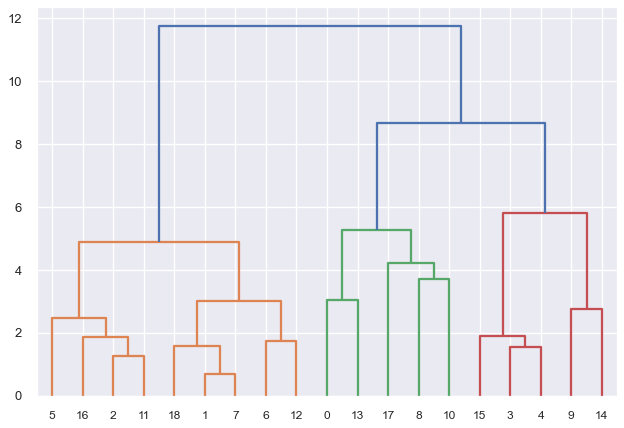

average :	0.00s


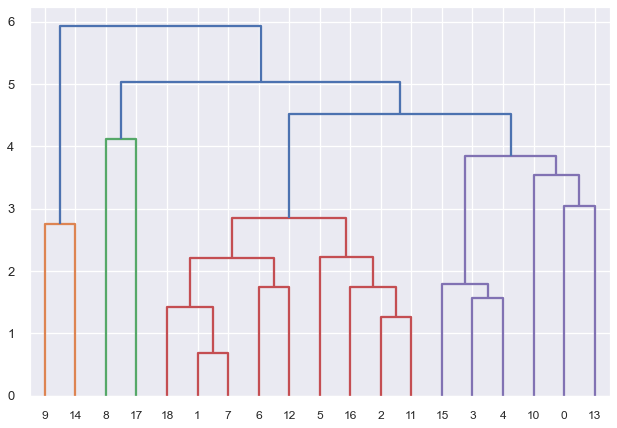

complete :	0.00s


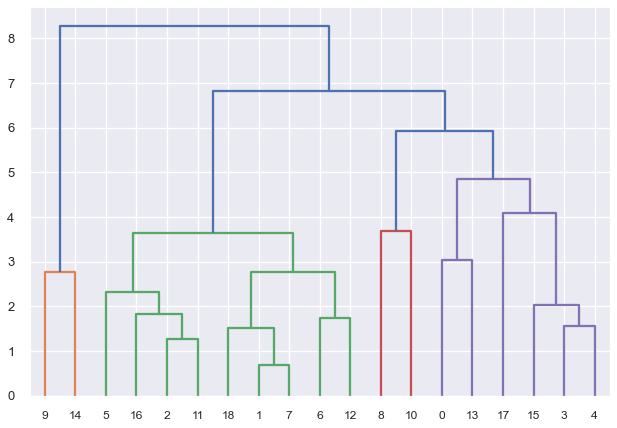

single :	0.00s


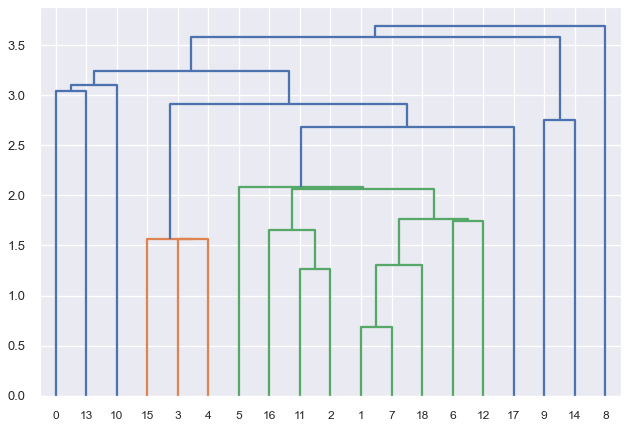

In [167]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from time import time

for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(X_scaled)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    
    plt.clf()
    plot_dendogram(clustering)

el modelo mas adecuado parece ser el de Ward y el numero de grupos optimo parece ser de 3. El tipo de metodo para calcular la distancia sera el euclidean.

In [168]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters  = 3 
                     )
modelo_hclust_ward.fit(X=X_scaled)

AgglomerativeClustering(n_clusters=3)

In [169]:
cluster_labels = modelo_hclust_ward.fit_predict(X_scaled)

silhouette_score(X_scaled, cluster_labels)

0.35510973632052056

Un valor bastante bajo de la silueta, por lo que se augura un modelo poco preciso

In [170]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_scaled, cluster_labels)

10.274547285098052

El valor de este índice es muy pequeña, otra señal de la poca efectividad que tendrá este modelo para el agrupamiento de variables.

In [171]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_scaled, cluster_labels)

NearestCentroid()

In [172]:
import plotly.express as px
grupos['cluster'] = cluster_labels
fig = px.scatter(grupos, x='Population',y='AbstentionPtge', color='cluster', text=grupos.index)
fig.show()

Se ve un patrón discriminado por el número de población, por ejemplo, el grupo amarillo constituye el de mayor población y con porcentaje menor al 35% de personas que se abstuvieron a votar, la única excepción parece ser el país vasco; el grupo azul oscuro parece ser de población no mayor a 2. pocos millones, pero con un porcentaje de no votantes arriba del 30 con la clara excepción de Murcia. Por último, está el grupo rosado que parece el de un patrón menos claro, pero reúne varias comunidades Autónomas con poca población y poco porcentaje de no votantes.

## Metodo Kmeans

Se graficara para explorar que valor de clusters sería el óptimo por utilizar

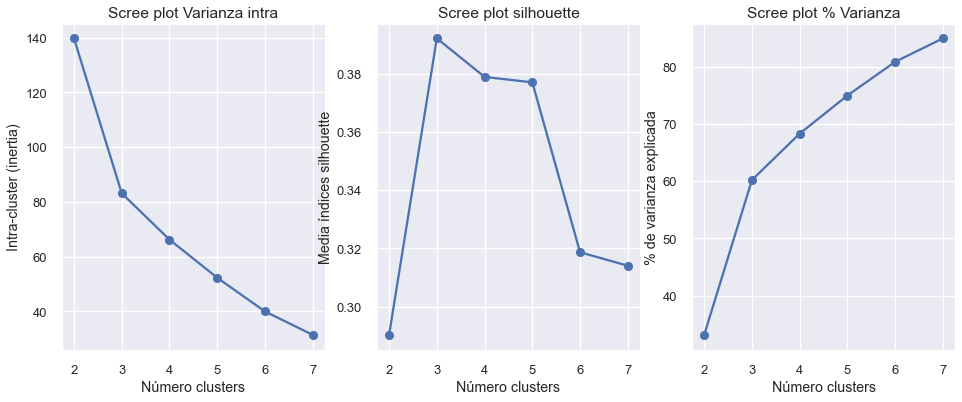

In [173]:
scree_plot_kmeans(grupos,8)
plt.show()

En efecto parece ser la mejor opcion 3 grupos, y si acaso 4.

In [174]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=25)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=3, n_init=25, random_state=25)

In [175]:
print(f'Varianza intra: {modelo_kmeans.inertia_}')
print('Centroides')
print()
print (modelo_kmeans.cluster_centers_)

Varianza intra: 83.17579507096636
Centroides

[[-0.44524184 -0.47861135  0.23913536  0.28229659 -0.8438001  -0.83223195
   0.89785172 -0.7550634  -0.45488128 -0.70583031]
 [ 1.40781597 -0.23163617 -0.51761207 -0.97435892  0.34803389  0.48714438
  -0.41982911  0.27377407  1.41612029  0.27933572]
 [-0.60638065  1.09313661  0.08716843  0.46622506  1.17080629  1.01087314
  -1.19630399  1.08534005 -0.597334    0.99115884]]


In [176]:
modelo_kmeans.labels_[:4]

array([1, 0, 0, 2])

In [177]:
y_predict = modelo_kmeans.predict(X=X_scaled)

silhouette_score(X_scaled, y_predict)

0.35510973632052056

In [178]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_scaled, y_predict)

10.274547285098052

El índice de Calinski-Harabasz, y el de la silueta se mantienen iguales al usar la misma cantidad de grupos o clusters.

Para poder evaluar mejor la influencia de las variables escogidas, se realizara un análisis de Componentes principales

### PCA

In [179]:
corr = grupos.iloc[:, :-1].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
Population,1.000,-0.225,-0.229,-0.378,0.030,0.159,-0.077,0.129,0.983,-0.070
AbstentionPtge,-0.225,1.000,-0.113,-0.063,0.753,0.454,-0.699,0.233,-0.206,0.737
Izda_Pct,-0.229,-0.113,1.000,0.236,-0.100,0.051,0.055,-0.124,-0.332,-0.104
Dcha_Pct,-0.378,-0.063,0.236,1.000,-0.042,-0.164,0.088,0.108,-0.396,-0.004
Age_under19_Ptge,0.030,0.753,-0.100,-0.042,1.000,0.717,-0.969,0.611,0.053,0.938
Age_19_65_pct,0.159,0.454,0.051,-0.164,0.717,1.000,-0.868,0.560,0.177,0.647
Age_over65_pct,-0.077,-0.699,0.055,0.088,-0.969,-0.868,1.000,-0.636,-0.100,-0.900
ForeignersPtge,0.129,0.233,-0.124,0.108,0.611,0.560,-0.636,1.000,0.172,0.545
totalEmpresas,0.983,-0.206,-0.332,-0.396,0.053,0.177,-0.100,0.172,1.000,-0.030
PobChange_pct,-0.070,0.737,-0.104,-0.004,0.938,0.647,-0.900,0.545,-0.030,1.000


In [180]:
calculate_bartlett_sphericity(grupos)

(347.53466166284744, 4.415824313983707e-44)

Pasa el test de esfericidad, por lo que no se cuenta con una matriz parecida a la identidad (existen correlaciones importantes entre las variables). Se puede continuar!

In [181]:
calculate_kmo(grupos.iloc[:, :-1])

(array([0.26378584, 0.92307331, 0.15079145, 0.80709349, 0.45002026,
        0.36347584, 0.45997642, 0.68278151, 0.2977025 , 0.89071008]),
 0.46429023425717975)

Se obtienen varios valores bajos de este coeficiente lo cual podría perjudicar un poco el estudio, pero se mantendrán las 10 variables para seguir las indicaciones del problema. 

In [182]:
scaler = StandardScaler()
scaler.fit(grupos.iloc[:, :-1])

X = scaler.transform(grupos.iloc[:, :-1])

In [183]:
pca = PCA()
scores_elec = pca.fit_transform(X)
scores_pd= pd.DataFrame(scores_elec)
scores_pd.head()


,0,1,2,3,4,5,6,7,8,9
0,0.362602,2.326062,-1.565893,1.817934,1.296857,-0.310255,0.125262,0.126014,-0.199510,0.000692
1,-2.342696,-0.659233,-0.279530,-0.364422,-0.155255,-0.709130,0.167852,-0.087550,0.031090,0.000071
2,-1.590470,-1.033625,0.267881,1.350497,0.354071,0.072091,0.640109,-0.288483,0.074851,-0.001192
3,1.852911,-0.758367,-1.051715,0.074808,-1.211164,-0.356559,0.705138,-0.061882,0.055738,0.001054
4,1.606178,-0.154542,-0.526484,0.566542,-0.857759,0.797436,0.887514,-0.084920,-0.054846,-0.000538


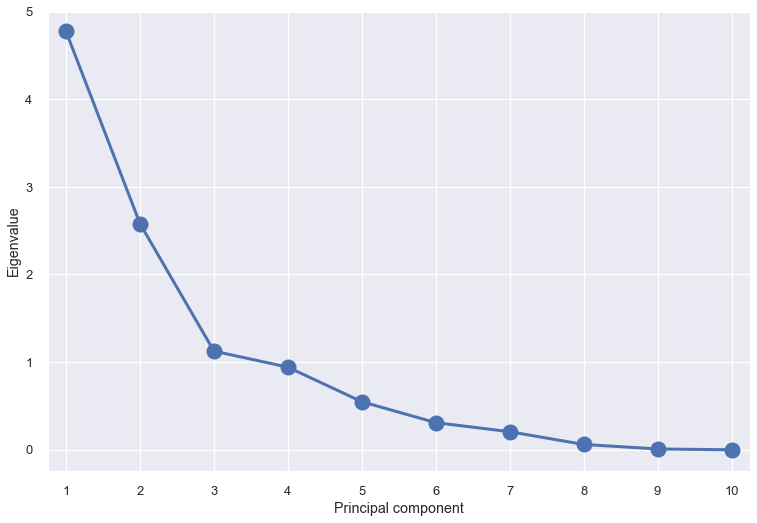

In [184]:
plt.style.use('seaborn-talk')

pca_scree(pca, marker='o', markersize=16, lw=3)

plt.show()

3 componentes es lo ideal.

In [185]:
#!pip install pca

In [186]:
from pca import pca

pcaModel = pca(normalize=True,n_components=3)
results = pcaModel.fit_transform(grupos.iloc[:,:-1])

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


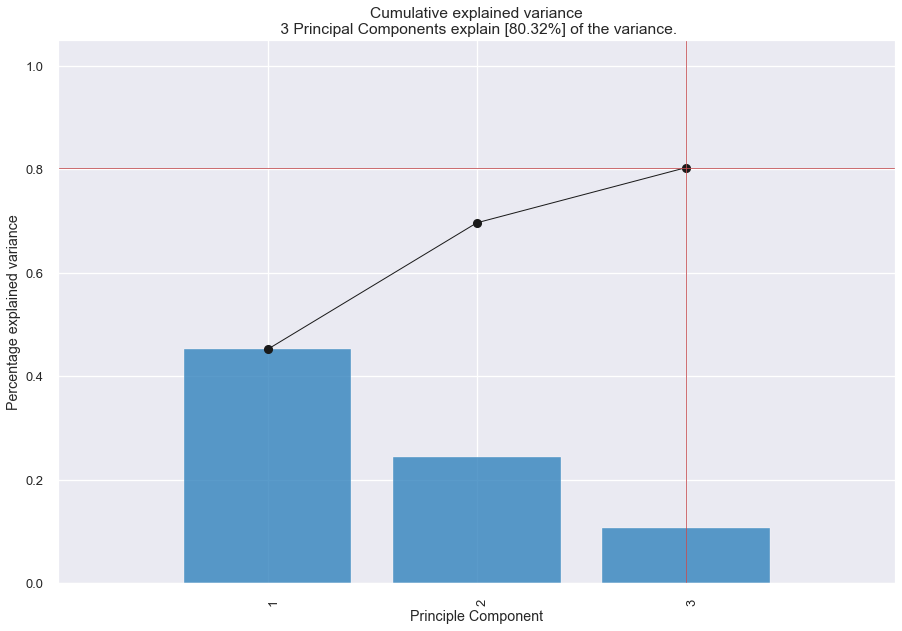

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 3 Principal Components explain [80.32%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 748.8x514.8 with 0 Axes>

In [187]:
pcaModel.plot()

In [188]:
pcaModel.results['loadings']

,Population,AbstentionPtge,Izda_Pct,Dcha_Pct,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,ForeignersPtge,totalEmpresas,PobChange_pct
PC1,0.035805,0.349931,-0.060199,-0.045927,0.456778,0.389146,-0.464471,0.320113,0.052058,0.435358
PC2,0.601349,-0.188950,-0.273441,-0.362819,-0.043508,0.067164,0.007743,0.060363,0.613712,-0.097561
PC3,-0.198797,0.406759,-0.568014,-0.487758,0.030180,-0.212316,0.053043,-0.397322,-0.144349,0.083519


Esta componente toma en mayor consideración los valores de personas que no votaron, rango de edades menos a 19 y entre 19 y 65, el porcentaje de extranjeros y el cambio de la población. Se ve muy afectado por valores del porcentaje de gente mayor a 65 anos, y menos por los de votantes de izquierda o derecha, ya que son negativos.

La segunda componente se centra principalmente en la población  y el total de empresas de la comunidad autónoma. Se ve muy afectada por los votos a derecha, un poco menos por los votos a izquierda

La última componente, que es la 3, se centra  únicamente en el porcentaje de gente que no voto y un poco en las personas menorea a 19 y mayores a 65.

En resumen:
- Componente 1 = reúne los rangos de edad, el porcentaje de extranjeros y el porcentaje de cambio en la población
- Componente 2: Se centra en la cantidad de población y número de empresas
- Componente 3: Se centra la cantidad de gente que se abstuvo de votar, por ello suman las variables de gente menor de edad y gente mayor (3ra edad)


In [189]:
grupos_pca = pcaModel.results['PC'].join(grupos['cluster'])
grupos_pca


,PC1,PC2,PC3,cluster
Andalucía,0.362602,2.326062,-1.565893,2
Aragón,-2.342696,-0.659233,-0.279530,1
Asturias,-1.590470,-1.033625,0.267881,1
Baleares,1.852911,-0.758367,-1.051715,0
Canarias,1.606178,-0.154542,-0.526484,0
Cantabria,-0.501123,-1.113352,-0.050152,1
CastillaLeón,-3.260228,-0.116185,0.106853,1
CastillaMancha,-2.478874,-0.285742,-0.531582,1
Cataluña,1.201837,4.172983,1.888621,2
Ceuta,3.124462,-2.030834,1.050726,0


In [190]:
fig = px.scatter(grupos_pca, x='PC1',y='PC2', color='cluster', text=grupos_pca.index)
fig.show()

In [191]:
fig = px.scatter(grupos_pca, x='PC1',y='PC3', color='cluster', text=grupos_pca.index)
fig.show()

Ahora que se tiene una mejor perspectiva y segregación de los grupos, se pueden interpretar:
-	**Grupo rosado**: Contiene valores bajos e incluso valores negativos del componente 1 e igualmente del componente 2, esto quiere decir que son comunidades Autónomas con baja población (componente2), sin muchos cambios en el nivel de población y la mayoría de esta es votante, y quizás mantengan un alto porcentaje de personas mayores a 65 años.
-	**Grupo Amarillo**: Contiene valores altos del componente 2, lo que quiere decir que en este grupo se sitúan las comunidades Autónomas con mayor población y numero de total empresas en ellas y se encuentran en un valor medio del primer componente, lo que indica que estas comunidades tuvieron grandes cambios en su población, viven muchos extranjeros en ellas y posiblemente los rangos de edad de sus habitantes estén entre los menores o mayores de 19 hasta los 65 años y al tener mucha población es mas probable que mucha gente no vote en estas, lo cual se puede evidenciar al comparar la componente 3 y 1, todas poseen un gran índice del componente 3, que se ve mayoritariamente influido por el porcentaje de gente que no vota 
-	**Grupo Azul**: Son comunidades con baja población, pero con altos índices del componente 1 y medios del componente 3, lo que quiere decir que mucha gente se abstiene de votar, podría contar con bastantes extranjeros y gente del rengo de edad de 0 hasta los 35 e incluso pudieron tener grandes cambios en el total de población.
